In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bezierv.classes.bezierv import Bezierv
from bezierv.algorithms.proj_grad import ProjGrad
from bezierv.algorithms.conv_bezierv import ConvBezier

In [2]:
np.random.seed(0)
x = np.sort(np.random.normal(1, 1, 1000))
y = np.sort(np.random.normal(1, 1, 1000))

In [3]:
n = 6
bezierv_x = Bezierv(n)
bezierv_y = Bezierv(n)

# The initalization of x controls is very important and we should have a smart way to do this

bx_controls_z = np.linspace(0, 1, n + 1)
by_controls_z = np.linspace(0, 1, n + 1) 

In [4]:
projgrad_x = ProjGrad(bezierv_x, x)
projgrad_y = ProjGrad(bezierv_y, y)

bezierv_x_fitted = projgrad_x.fit(bx_controls_z, step=0.001)
bezierv_y_fitted = projgrad_y.fit(by_controls_z, step=0.001)

In [5]:
projgrad_x.mse

np.float64(3.722312494802878e-05)

In [6]:
projgrad_y.mse

np.float64(5.341897208606686e-05)

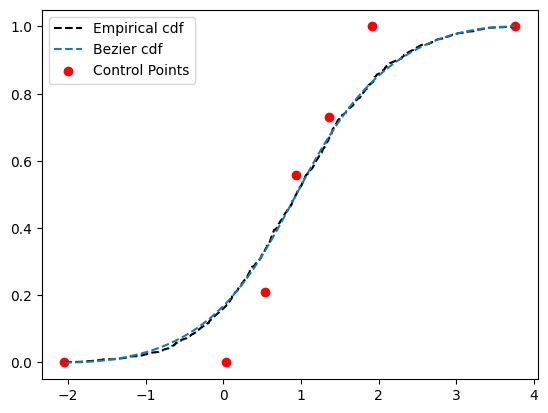

In [7]:
bezierv_x_fitted.plot_cdf(x)

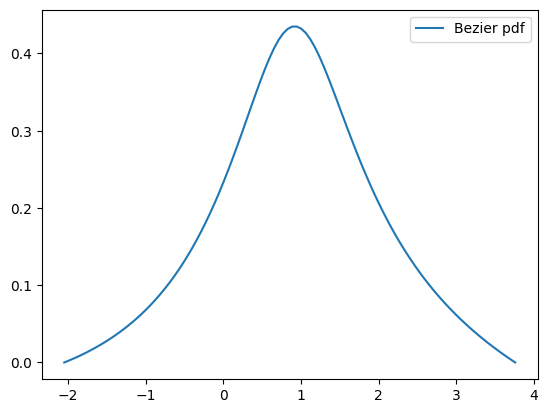

In [8]:
bezierv_x_fitted.plot_pdf()

In [9]:
bezierv_y_fitted.plot_cdf(y, ecdf=None)

TypeError: Bezierv.plot_cdf() got an unexpected keyword argument 'ecdf'

C:\Users\esteb\OneDrive - Universidad de los andes\Documentos\ANDES\Primer Semestre - MIND\Research\bezierv\bezierv\classes\bezierv.py:542: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


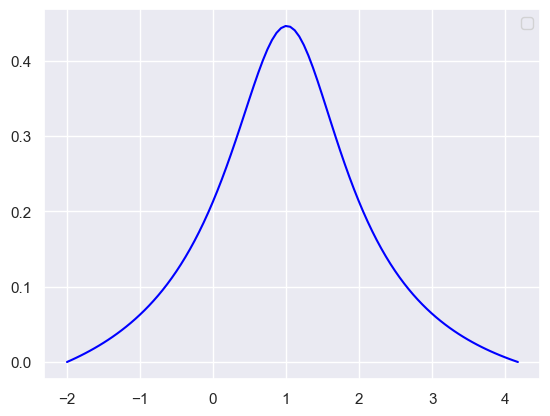

In [ ]:
bezierv_y_fitted.plot_pdf()

In [ ]:
print(bezierv_x_fitted.get_mean())
print(bezierv_x_fitted.get_variance())
print(bezierv_y_fitted.get_mean())
print(bezierv_y_fitted.get_variance())

0.9451072911932644
0.9972262591944393
1.0122252543033134
1.0237242716730786


In [ ]:
from scipy.integrate import quad
result, error = quad(bezierv_x_fitted.pdf_x, x[0], x[-1])
result


0.9999999999998349

In [ ]:
convoluter = ConvBezier(bezierv_x_fitted, bezierv_y_fitted, m=200)

In [ ]:
convoluter.cdf_z(2)

0.5132234956590461

In [ ]:
bezierv_conv = convoluter.conv()

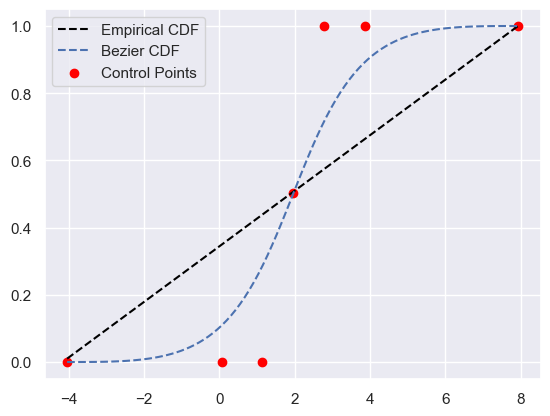

In [ ]:
bezierv_conv.plot_cdf()

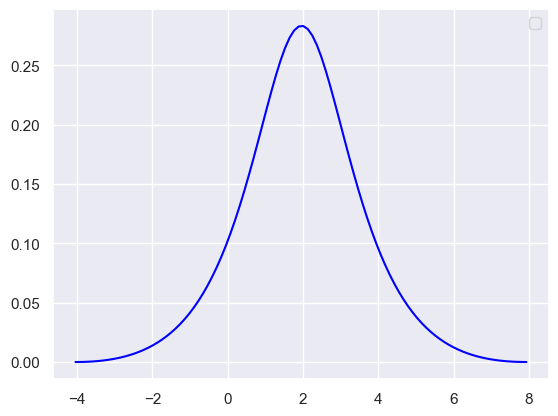

In [ ]:
bezierv_conv.plot_pdf()

In [ ]:
bezierv_conv.get_mean()
bezierv_conv.get_variance()

2.4567538383233436